# Assignment 3
## Question 1
Download the rock paper sissors data.

In [178]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

# download and extract rps data
tarball_path = "rps-data.tgz"
if not Path(tarball_path).is_file():
  url = "https://github.com/RochX/comp486-assignments/raw/main/assignment3/rps-data.tgz"
  urllib.request.urlretrieve(url, "rps-data.tgz")
  with tarfile.open(tarball_path) as rps_tarball:
    rps_tarball.extractall()

## Question 2

Convert the images into a csv file using the provided code.

We run `rm rps-training-data.csv` to delete the file if it already exists, since the provided code simply appends to this file.
If we don't delete it initialially, we can get duplicate data.

In [179]:
!rm rps-training-data.csv

In [180]:
import csv
import numpy as np
import os
from PIL import Image, UnidentifiedImageError

def createFileList(myDir, format='.png'):
  fileList = []
  print(myDir)
  labels = []
  names = []
  keywords = {"paper": "1","rock": "2","scissors":"3"} # keys and values to be changed as needed
  for root, dirs, files in os.walk(myDir, topdown=True):
    for name in files:
      if name.endswith(format):
        fullName = os.path.join(root, name)
        fileList.append(fullName)
      for keyword in keywords:
        if keyword in name:
          labels.append(keywords[keyword])
        else:
          continue
      names.append(name)
  return fileList, labels, names

# load the original image
myFileList, labels, names = createFileList("rps-data/rps-training-set")
i = 0

failed_files = []
for file in myFileList:
  try:
    img_file = Image.open(file)
    #img_file.show()

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((width, height))
    value = value.flatten()
    value = np.append(value,labels[i])
    i +=1
    #print(value)
    with open("rps-training-data.csv", 'a') as f:
      writer = csv.writer(f)
      writer.writerow(value)
  except UnidentifiedImageError:
    failed_files.append(file)

print(f"Number of failed files: {len(failed_files)} out of {len(myFileList)}")
with open("failed_files.log", "w") as log_file:
  for file in failed_files:
    log_file.write(file + "\n")

rps-data/rps-training-set


<ipython-input-180-b589c28154ea>:45: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((width, height))


Number of failed files: 0 out of 2520


## Question 3
Use `read_csv` in `pandas` to read the CSV file and assign it to a variable and print it.

In [181]:
rps_training_data = pd.read_csv("rps-training-data.csv", header=None)
# rename the label column to be clearly distinguish between the image data and label
rps_training_data = rps_training_data.rename(columns={2304: "RPS Label"})
rps_training_data

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,RPS Label
0,253,253,253,253,253,253,253,253,253,253,...,250,246,247,248,248,249,249,249,250,3
1,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,254,254,254,254,1
2,255,255,255,255,255,255,255,255,255,255,...,239,255,253,254,254,254,254,254,254,1
3,253,253,253,253,253,253,253,253,253,253,...,143,251,246,247,247,247,248,248,248,3
4,253,253,253,253,253,253,253,253,253,253,...,247,247,247,248,248,249,248,249,250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,254,254,253,253,253,253,253,253,253,253,...,213,251,245,247,247,247,247,247,248,3
2516,253,254,253,253,254,253,253,253,253,253,...,245,247,246,247,247,247,248,248,248,3
2517,253,253,253,253,253,253,253,252,252,252,...,246,247,247,248,248,249,249,249,250,1
2518,253,253,253,253,253,253,253,253,253,253,...,248,248,248,249,249,249,249,250,250,2


## Question 4
Choose two methods to discover the data.

In [182]:
# get the set of values for the last column
rps_training_data["RPS Label"].value_counts()

3    840
1    840
2    840
Name: RPS Label, dtype: int64

In [183]:
rps_training_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,RPS Label
count,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,...,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000
mean,253.978968,253.918254,253.816270,253.828571,253.794444,253.774206,253.782540,253.759524,253.724603,253.646429,...,236.407937,246.196429,249.318651,250.092857,250.341667,250.487302,250.548810,250.905952,251.093651,2.000000
std,0.884763,0.915041,0.955113,0.950949,0.962068,0.966391,0.972188,0.991482,1.027002,1.108982,...,45.437036,24.461682,8.978231,3.190291,2.913251,2.816584,2.712943,2.477105,2.285142,0.816659
min,253.000000,253.000000,253.000000,253.000000,253.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,0.000000,0.000000,0.000000,219.000000,246.000000,246.000000,247.000000,247.000000,247.000000,1.000000
25%,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,246.000000,247.000000,247.000000,248.000000,248.000000,248.000000,248.000000,249.000000,249.000000,1.000000
50%,254.000000,254.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,247.000000,248.000000,248.000000,249.000000,249.000000,249.000000,249.000000,250.000000,250.000000,2.000000
75%,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,3.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,254.000000,254.000000,254.000000,254.000000,3.000000


## Question 5
Make sure your training data is shuffled.

In [184]:
from sklearn.utils import shuffle
rps_training_data_shuffled = shuffle(rps_training_data)

rps_training_data_shuffled

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,RPS Label
1123,253,253,253,253,253,253,252,252,252,252,...,246,247,248,248,248,249,249,250,250,1
2173,253,253,253,253,253,253,253,253,253,253,...,248,248,249,249,250,250,250,250,251,3
2327,254,253,253,254,254,253,253,253,253,253,...,247,247,247,248,248,248,248,249,249,2
115,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,254,254,254,254,1
635,253,253,253,253,253,253,253,253,253,253,...,248,248,248,249,249,249,249,250,250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,254,253,254,254,254,253,253,253,253,253,...,247,247,247,248,248,248,248,249,249,2
1774,255,255,255,255,255,254,255,255,255,255,...,254,254,254,254,254,254,254,254,254,1
1059,253,253,253,253,253,253,253,253,253,253,...,245,246,246,247,247,247,248,248,248,1
497,254,254,253,253,253,253,253,253,253,253,...,246,246,247,247,248,248,248,249,249,3


## Question 6
Separate the predictors (`rpsPredictors`) and the labels (`rpsLabels`) in the training set

In [185]:
rpsPredictors = rps_training_data_shuffled.drop("RPS Label", axis=1)
rpsLabels = rps_training_data_shuffled["RPS Label"]

In [186]:
rpsPredictors.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
1123,253,253,253,253,253,253,252,252,252,252,...,246,246,247,248,248,248,249,249,250,250
2173,253,253,253,253,253,253,253,253,253,253,...,247,248,248,249,249,250,250,250,250,251
2327,254,253,253,254,254,253,253,253,253,253,...,246,247,247,247,248,248,248,248,249,249
115,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,254,254,254,254,254
635,253,253,253,253,253,253,253,253,253,253,...,248,248,248,248,249,249,249,249,250,250


In [187]:
rpsLabels.head()

1123    1
2173    3
2327    2
115     1
635     1
Name: RPS Label, dtype: int64

## Question 7
Display an instance's feature vector using `matplotlib`'s `imshow()` function and
check the label for that image. (If the picture is paper, then the label should be 1, if the
picture is a rock, then the label should be 2, and if the picture is scissors, then the label
should be 3)

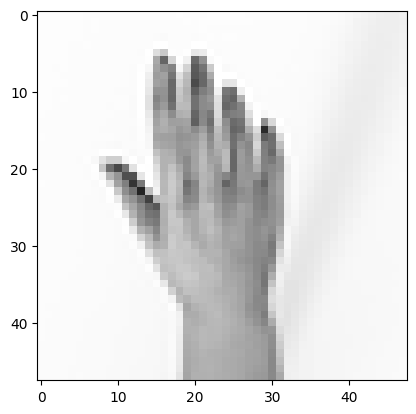

In [188]:
import matplotlib.pyplot as plt

def plot_rps(image_data):
  image = np.resize(image_data.values.copy(), (48, 48))
  plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# get instance with index, then display the image in grey-scale and get its label
index = 0
instance = rpsPredictors.iloc[[index]]
label = rpsLabels.iloc[[index]]

plot_rps(instance)
plt.show()

## Question 8
Train a binary classifier (a stochastic gradient descent (SGD)), to distinguish between just two classes, paper, and non-paper.

In [189]:
paper_train = (rpsLabels == 1)
paper_train

1123     True
2173    False
2327    False
115      True
635      True
        ...  
159     False
1774     True
1059     True
497     False
1909    False
Name: RPS Label, Length: 2520, dtype: bool

In [190]:
from sklearn.linear_model import SGDClassifier

sgd_clf_paper = SGDClassifier(random_state=42)
sgd_clf_paper.fit(rpsPredictors, paper_train)

SGDClassifier(random_state=42)

## Question 9
Try to feed your model with some instants and **explain** the output.

In [191]:
rpsPredictors[:6]

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
1123,253,253,253,253,253,253,252,252,252,252,...,246,246,247,248,248,248,249,249,250,250
2173,253,253,253,253,253,253,253,253,253,253,...,247,248,248,249,249,250,250,250,250,251
2327,254,253,253,254,254,253,253,253,253,253,...,246,247,247,247,248,248,248,248,249,249
115,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,254,254,254,254,254
635,253,253,253,253,253,253,253,253,253,253,...,248,248,248,248,249,249,249,249,250,250
1176,254,253,253,253,253,253,253,253,253,253,...,245,246,246,247,247,247,248,248,249,249


In [192]:
rpsLabels[:6]

1123    1
2173    3
2327    2
115     1
635     1
1176    3
Name: RPS Label, dtype: int64

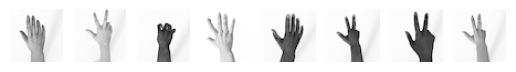

In [193]:
import matplotlib.pyplot as plt

rpsInstances = rpsPredictors[:8]

plot_rows, plot_columns = 1, len(rpsInstances)

def subplot_rps(image_data, index):
  image = np.resize(image_data.values.copy(), (48, 48))
  plt.subplot(plot_rows, plot_columns, index)
  plt.imshow(image, cmap='gray', vmin=0, vmax=255)
  plt.axis("off")


for i in range(len(rpsInstances)):
  subplot_rps(rpsPredictors.iloc[[i]], i+1)


plt.show()

In [194]:
sgd_clf_paper.predict(rpsInstances)

array([ True, False, False,  True,  True, False, False, False])

TODO: Explain output...

## Question 10
Use the `cross_val_score()` function to evaluate your SGDClassifier model, using $k$-fold cross-validation with five folds. **Write** your observations.

## Question 11
Compute the confusion matrix for your classifier and **explain** the output.

## Question 12
Calculate precision score, recall score and F1 score.

## Question 13
Use `matplotlib` to plot precision and recall as functions of the threshold value.
**Write** your observations.

## Question 14
For what threshold you can get 95% precision?

## Question 15
plot the ROC curve (FPR against the TPR) using `matplotlib` then Calculate the area under the curve (AUC). Is your classifier perfect? Why?

## Question 16
Train an SGDClassifier on a multiclass dataset and use it to make predictions.

## Question 17
Plot the confusion matrix for your multiclass classifier and **explain** the output.

## Question 18
Plot Confusion matrix with errors only, normalized by row and confusion matrix with errors only by column. **Explain one output for each.**